### Get the Data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\s_sad\lab-customer-analysis-round-2\files_for_lab\csv_files\marketing_customer_analysis.csv", header = 0, index_col = 0)

### Dealing with Data 

In [3]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       10910 non-null  object 
 1   State                          10279 non-null  object 
 2   Customer Lifetime Value        10910 non-null  float64
 3   Response                       10279 non-null  object 
 4   Coverage                       10910 non-null  object 
 5   Education                      10910 non-null  object 
 6   Effective To Date              10910 non-null  object 
 7   EmploymentStatus               10910 non-null  object 
 8   Gender                         10910 non-null  object 
 9   Income                         10910 non-null  int64  
 10  Location Code                  10910 non-null  object 
 11  Marital Status                 10910 non-null  object 
 12  Monthly Premium Auto           10910 non-null 

In [4]:
#shape of dataFrame
df.shape

(10910, 25)

In [5]:
#Standardize header names
#1. user lower case
df.columns = df.columns.str.lower()

In [6]:
#renaming
df.rename(columns={'customer': 'customer id', 'employmentstatus': 'employment status'}, inplace = True)

In [7]:
df.columns

Index(['customer id', 'state', 'customer lifetime value', 'response',
       'coverage', 'education', 'effective to date', 'employment status',
       'gender', 'income', 'location code', 'marital status',
       'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')

In [8]:
#3.removing spaces and adding underscore
df.columns = df.columns.map(lambda x: x.replace(" ","_"))

In [9]:
df.columns

Index(['customer_id', 'state', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [10]:
#Which variables are numerical
df.select_dtypes(include = [np.number])

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [11]:
#which variables are categorical?
df.select_dtypes(exclude=[np.number])

,customer_id,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [12]:
#check and deal with nan
df.isna().sum() # checking NAN

customer_id                         0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [13]:
#Replacing NAN with mode(State,Vehicle_class,Vehicle_size, months_since_last_claim, vehicle_type)
df['state'] = df['state'].fillna(df['state'].mode()[0])
df['vehicle_class'] = df['vehicle_class'].fillna(df['vehicle_class'].mode()[0])
df['vehicle_size'] = df['vehicle_size'].fillna(df['vehicle_size'].mode()[0])
df['months_since_last_claim'] = df['months_since_last_claim'].fillna(df['months_since_last_claim'].mode()[0])
df['vehicle_type'] = df['vehicle_type'].fillna(df['vehicle_type'].mode()[0])

df['state'].isna().sum()
df['vehicle_class'].isna().sum()
df['vehicle_size'].isna().sum()
df['vehicle_type'].isna().sum()

0

In [14]:
#Replacing NAN with 0( number_of_open_complaints)
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(0)
df['number_of_open_complaints'].isna().sum()

0

In [15]:
#Replacing NAN with 'unknown' for Response
df['response'] = df['response'].fillna('unknown')

In [16]:
#Dealing with Datetime column
from datetime import date
df['effective_to_date']

0        2/18/11
1        1/18/11
2        2/10/11
3        1/11/11
4        1/17/11
          ...   
10905    1/19/11
10906     1/6/11
10907     2/6/11
10908    2/13/11
10909     1/8/11
Name: effective_to_date, Length: 10910, dtype: object

In [17]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df['effective_to_date']

0       2011-02-18
1       2011-01-18
2       2011-02-10
3       2011-01-11
4       2011-01-17
           ...    
10905   2011-01-19
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
10909   2011-01-08
Name: effective_to_date, Length: 10910, dtype: datetime64[ns]

In [18]:
df['new_effective_to_date'] = (df['effective_to_date']).dt.month
df.new_effective_to_date

0        2
1        1
2        2
3        1
4        1
        ..
10905    1
10906    1
10907    2
10908    2
10909    1
Name: new_effective_to_date, Length: 10910, dtype: int64

In [19]:
df.head()

,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,new_effective_to_date
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [20]:
df.isna().sum() # all nans have been removed from data.

customer_id                      0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
new_effective_to_date            0
dtype: int64

### Exploring Data

In [21]:
#data describtion
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,new_effective_to_date
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,14.444180,48.091934,0.361962,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,10.187488,27.940675,0.890134,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,5.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,13.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


Big difference b/w mean and standard deviation of each variable represents high volatility in dataset.Except months_since_policy_inspection all the variables have high variablity or spread of observations. Except months_since_policy_inception, none of variables have same mean and median, which also confirms that none of them have normal distribution. 

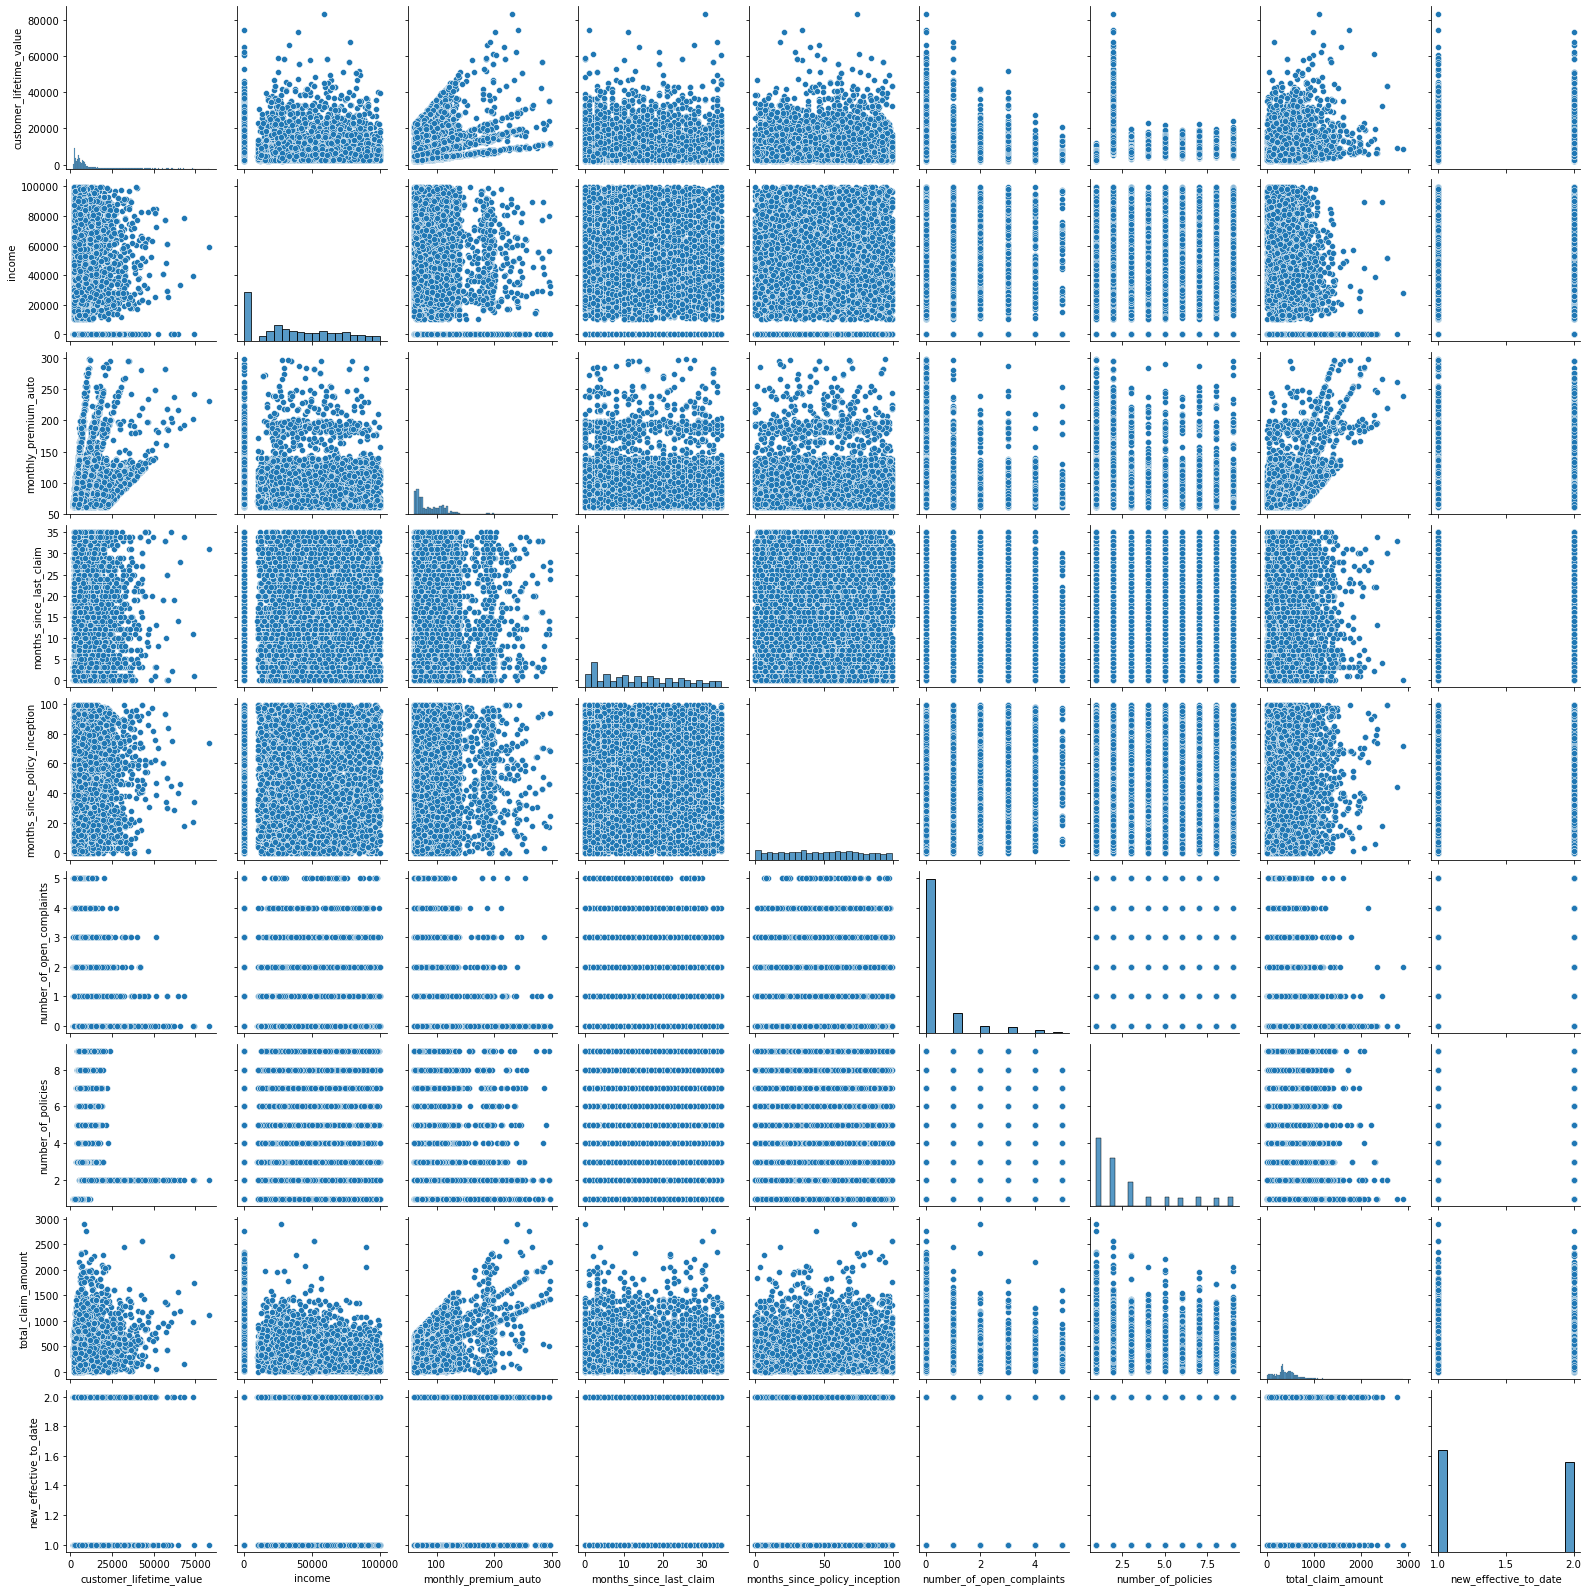

In [22]:
# let us know have a look on bivariate relationship.
sns.pairplot(df)

In [23]:
df_corr = df.corr()
df_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,new_effective_to_date
customer_lifetime_value,1.000000,0.028306,0.403069,0.017062,0.016960,-0.030616,0.016024,0.232626,-0.009234
income,0.028306,1.000000,-0.009788,-0.018053,-0.005903,0.008425,-0.009960,-0.354141,-0.000443
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008043,0.018953,-0.010059,-0.020505,0.631799,0.007253
months_since_last_claim,0.017062,-0.018053,0.008043,1.000000,-0.036809,0.030285,0.000881,0.008327,-0.021782
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.036809,1.000000,0.004165,-0.009123,0.003095,0.015163
number_of_open_complaints,-0.030616,0.008425,-0.010059,0.030285,0.004165,1.000000,0.001681,-0.012380,-0.005802
number_of_policies,0.016024,-0.009960,-0.020505,0.000881,-0.009123,0.001681,1.000000,-0.008923,0.005127
total_claim_amount,0.232626,-0.354141,0.631799,0.008327,0.003095,-0.012380,-0.008923,1.000000,0.001425
new_effective_to_date,-0.009234,-0.000443,0.007253,-0.021782,0.015163,-0.005802,0.005127,0.001425,1.000000


1. correlation coefficients shows that customer lifetime value is strongly positively related with monthly_premium_auto and total claim amount. 
2. Income is strongly inversily related with total_claim_amount.
3.Similarly monthly_premium_auto is strongly positively related with customer lifetime value and total claim amount.
4.months since last claim, months since policy inception, no. of open complaints,no. of policies, does not show any significant relationship with anyother variable.
5. total claim amount have (+)relationship with customer lifetime value and monthly premium auto, (-)ve relationship with income

In [24]:
#correlation b/w customer_lifetime_value and other variables, as we will try to predict customer_lifetime_value. 
df_corr['customer_lifetime_value'].sort_values(ascending = False)

customer_lifetime_value          1.000000
monthly_premium_auto             0.403069
total_claim_amount               0.232626
income                           0.028306
months_since_last_claim          0.017062
months_since_policy_inception    0.016960
number_of_policies               0.016024
new_effective_to_date           -0.009234
number_of_open_complaints       -0.030616
Name: customer_lifetime_value, dtype: float64

Strong positive relationship b/w customer_lifetime_value and monthly premium auto and total claim amount. 

In [27]:
#bar plot of customer_lifetime_value with few categorical variables.
df.education.unique()

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

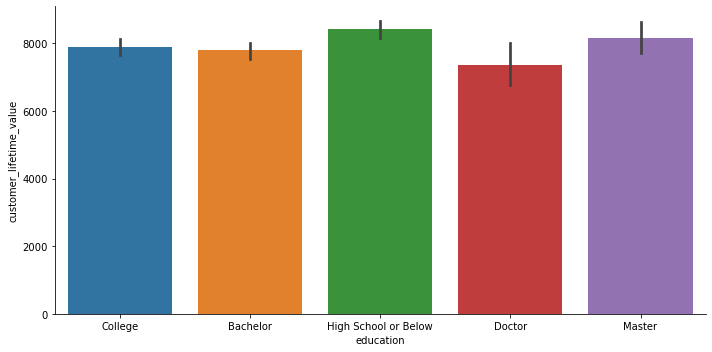

In [47]:
sns.catplot(x = "education", y = "customer_lifetime_value", data=df, kind = "bar", height = 5, aspect = 2)

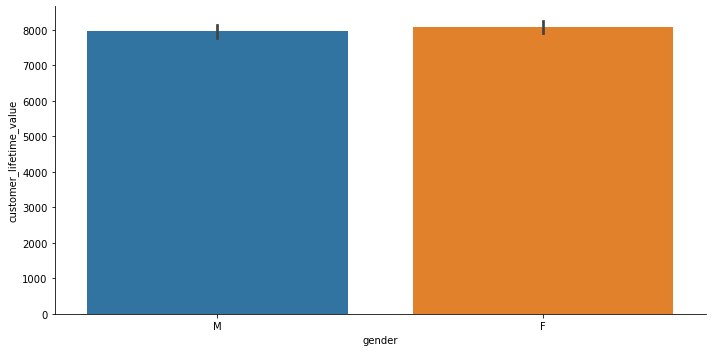

In [50]:
sns.catplot(x= "gender",y = "customer_lifetime_value", data = df, kind = "bar", height = 5, aspect = 2)

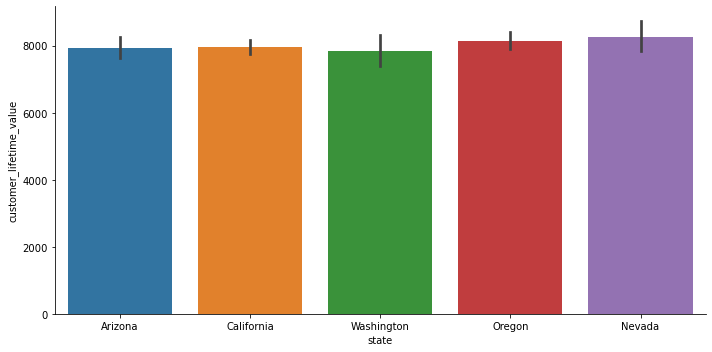

In [51]:
sns.catplot(x= "state", y = "customer_lifetime_value", data = df, kind = "bar", height = 5, aspect = 2)

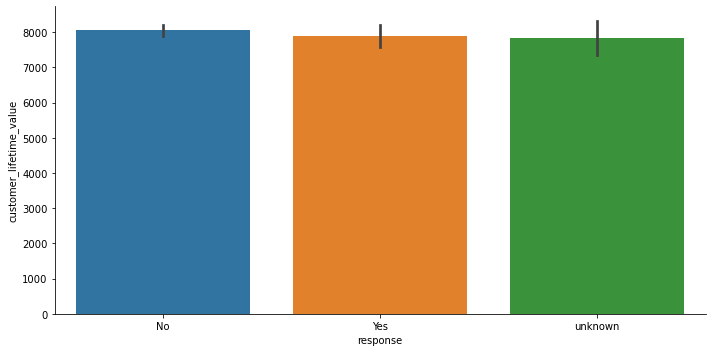

In [52]:
sns.catplot(x= "response", y = "customer_lifetime_value", data = df, kind = "bar", height = 5, aspect = 2)

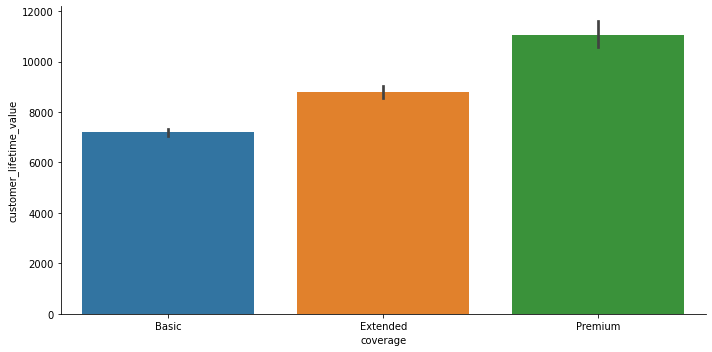

In [53]:
sns.catplot(x= "coverage", y = "customer_lifetime_value", data = df, kind = "bar", height = 5, aspect = 2)

income


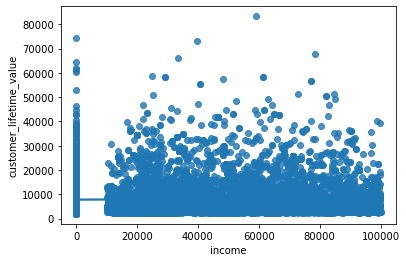

total_claim_amount


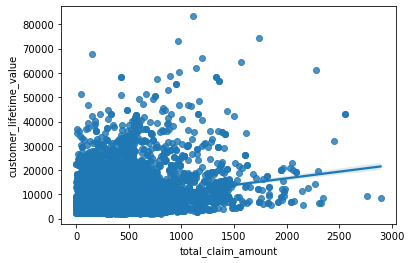

monthly_premium_auto


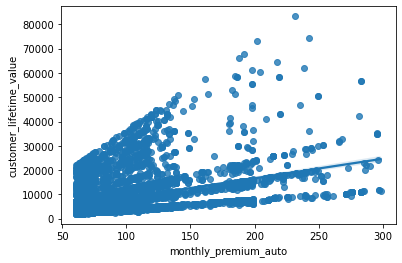

months_since_last_claim


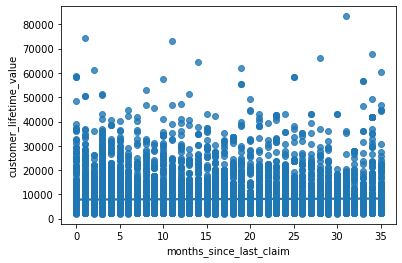

months_since_policy_inception


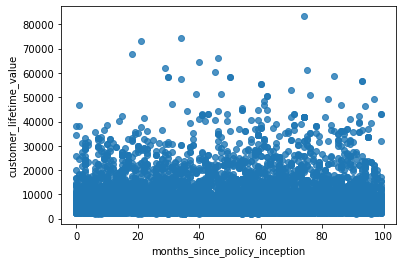

number_of_open_complaints


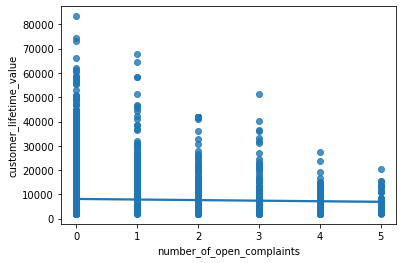

number_of_policies


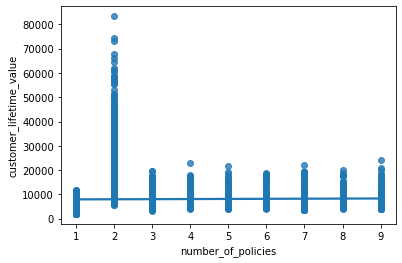

In [29]:
for columns in ['income','total_claim_amount','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']:
    print(columns)
    sns.regplot(x=columns,y='customer_lifetime_value', data = df)
    plt.show()

A horizontal fitted line as observed in income, months_since_last_claim, months_since_policy_inception and number_of_polices shows that there is no relationship b/w these variables and customer_lifetime_value, while total_claim_amount and monthly_premium_auto shows slight relationship. But overall, our training model is not good fit.

### Processing Data
#### 1. X-y split.

In [31]:
# x =  explanatory features/variables, y = target vector

x = df.iloc[:,[1,3,4,5,7,8,9,10,12,13,14,15,16,17,18,20,21,22,23,24]]
x

,state,response,coverage,education,employment_status,gender,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,Arizona,No,Basic,College,Employed,M,48029,Suburban,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Agent,292.800000,Four-Door Car,Medsize,A
1,California,No,Basic,College,Unemployed,F,0,Suburban,64,3.0,26,0.0,1,Personal Auto,Personal L3,Call Center,744.924331,Four-Door Car,Medsize,A
2,Washington,No,Basic,Bachelor,Employed,M,22139,Suburban,100,34.0,31,0.0,2,Personal Auto,Personal L3,Call Center,480.000000,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,49078,Suburban,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Branch,484.013411,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,117,3.0,31,0.0,7,Personal Auto,Personal L2,Branch,707.925645,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,Unemployed,F,0,Suburban,253,3.0,40,0.0,7,Personal Auto,Personal L1,Web,1214.400000,Luxury Car,Medsize,A
10906,Oregon,No,Basic,College,Employed,F,61146,Urban,65,7.0,68,0.0,6,Personal Auto,Personal L3,Branch,273.018929,Four-Door Car,Medsize,A
10907,Arizona,No,Extended,Bachelor,Employed,F,39837,Rural,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Web,381.306996,Luxury SUV,Medsize,A
10908,California,No,Premium,College,Employed,F,64195,Urban,158,0.0,27,4.0,6,Personal Auto,Personal L1,Branch,618.288849,SUV,Medsize,A


In [32]:
y = df.iloc[:, 2]
y

0         4809.216960
1         2228.525238
2        14947.917300
3        22332.439460
4         9025.067525
             ...     
10905    15563.369440
10906     5259.444853
10907    23893.304100
10908    11971.977650
10909     6857.519928
Name: customer_lifetime_value, Length: 10910, dtype: float64

#### 2.Normalize (numerical). 

In [33]:
# in order to normalize numerical variables, we will first define numerical data.
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,new_effective_to_date
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,9025.067525,23675,117,3.0,31,0.0,7,707.925645,1
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,3.0,40,0.0,7,1214.400000,1
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_df)
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis =0))


[-1.42629568e-16  4.94970192e-17  1.04855527e-16  6.77327631e-17
  1.10717017e-16  5.27534020e-17  5.73123380e-17  3.06099987e-17
 -9.57376555e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


Mean around zero and Standard deviation of 1 shows that all numerical variables have been normalized. 